In [70]:
import numpy as np
import matplotlib.pyplot as plt

from fourrooms import FourRoomsMatrix

env = FourRoomsMatrix(layout='4rooms')

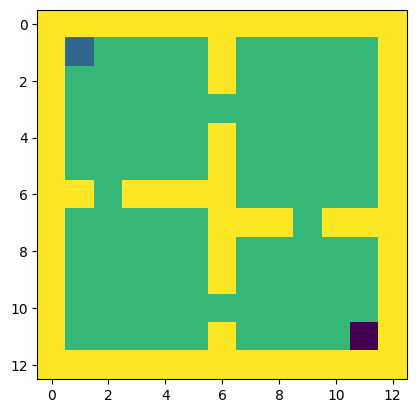

In [87]:
env = FourRoomsMatrix(layout='4rooms', goal=103)
env.reset(init=0)
state = env.render()
plt.imshow(state.reshape((13, 13)))

In [28]:
env.render_state().reshape(13, 13)

array([[ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01],
       [ 0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.01],
       [ 0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.01],
       [ 0.01,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.01],
       [ 0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.01],
       [ 0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.01],
       [ 0.01,  0.01,  0.  ,  0.01,  0.01,  0.01,  0.01,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.01],
       [ 0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.01,  0.01,
        -0.01,  0.01,  0.01,  0.01],
       [ 0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.01],
       [ 0.01,  0.  ,  0.  ,

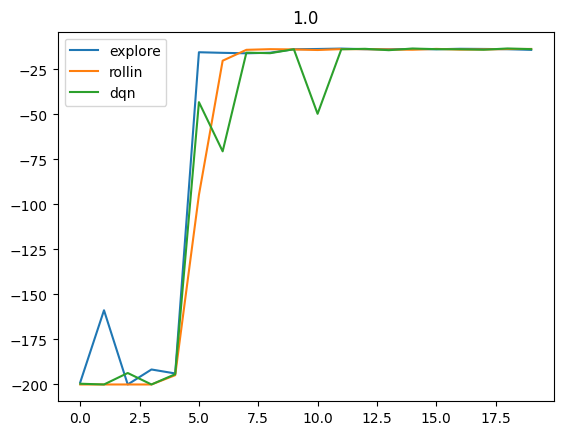

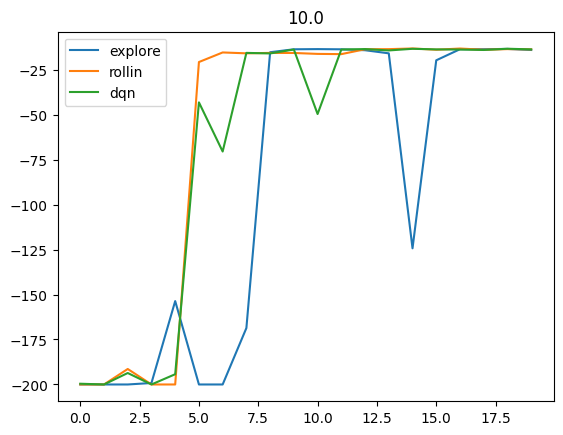

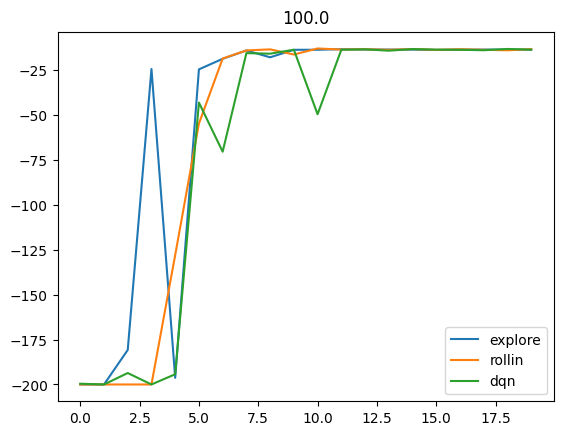

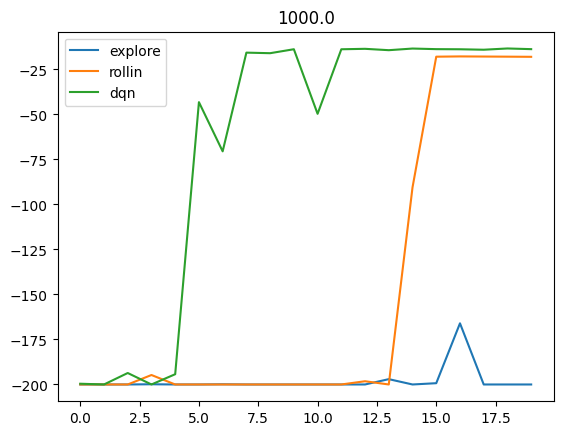

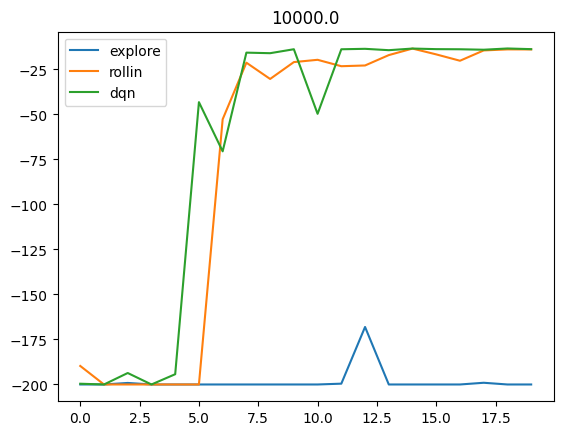

In [5]:
import matplotlib.pyplot as plt
import numpy as np

lams = [1.0, 10.0, 100.0, 1000.0, 10000.0]
# lams = [1.0]

for lam in lams:
    explore_return = np.load(f"./visualization/explore_dqn_{lam}_2_return.npy")
    rollin_return = np.load(f"./visualization/rollin_dqn_{lam}_3_return.npy")
    dqn_return = np.load(f"./visualization/pure_dqn_1_return.npy")
    # print(explore_return)

    plt.figure()
    plt.title(lam)
    plt.plot(-explore_return, label='explore')
    plt.plot(-rollin_return, label='rollin')
    plt.plot(-dqn_return, label='dqn')
    plt.legend()

[ 2.02203e+01  2.02203e+01  2.02203e+01  2.02203e+01  2.02203e+01
  2.02203e+01  2.02203e+01  2.02203e+01  2.02203e+01  2.02203e+01
  2.02203e+01  2.02203e+01  2.02203e+01  2.02203e+01  3.10000e-01
  0.00000e+00  0.00000e+00  1.00000e-02  0.00000e+00  2.02203e+01
  8.70000e-01  3.47300e+01  3.51600e+01  2.39000e+00  2.50000e-01
  2.02203e+01  2.02203e+01  4.00000e-02  4.70000e-01  3.20000e-01
  2.70000e-01  3.10000e-01  2.02203e+01  2.47000e+00  4.22000e+00
  1.44700e+01  1.31500e+01  3.60000e-01  2.02203e+01  2.02203e+01
  1.50000e-01  3.70000e+00  1.26100e+01  6.66000e+00  6.68000e+00
  8.05000e+00  4.92200e+01  4.35800e+01  2.56400e+01  1.26000e+00
  4.40000e-01  2.02203e+01  2.02203e+01  1.50000e-01  3.47000e+00
  3.48000e+00  4.60000e-01  2.40000e-01  2.02203e+01  6.07500e+01
  5.84100e+01  2.76800e+01  4.46000e+00  1.29000e+00  2.02203e+01
  2.02203e+01  9.80000e-01  7.92000e+00  3.44000e+00  2.00000e-01
  2.00000e-02  2.02203e+01  2.01400e+01  2.24400e+01  3.61600e+01
  5.99200e

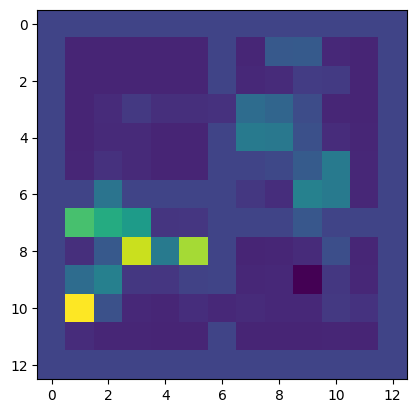

In [146]:
eval = np.load(f"./visualization/explore_dqn_{1000.0}_4_viz.npy")[8:, :].sum(axis=0)
print(eval)
plt.imshow(eval.reshape(13, 13))

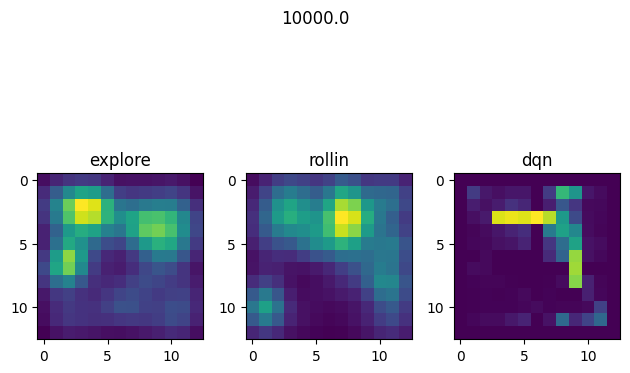

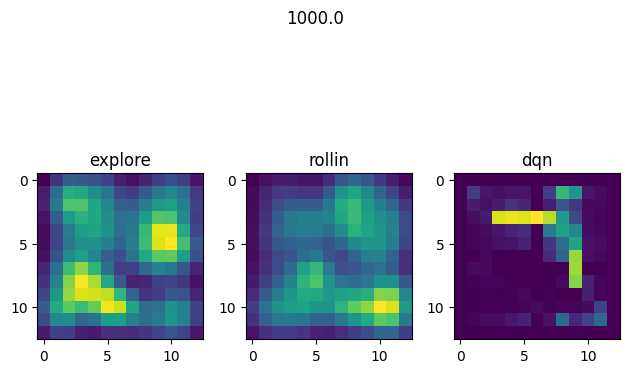

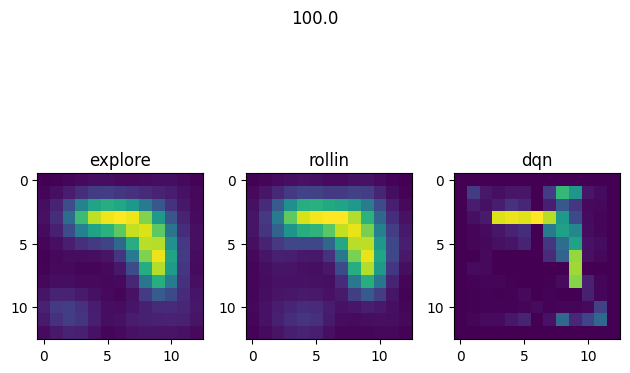

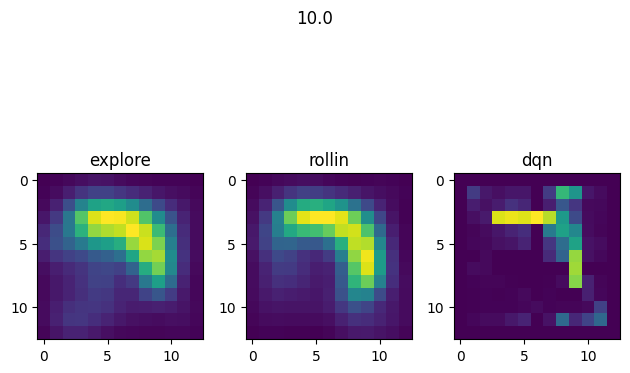

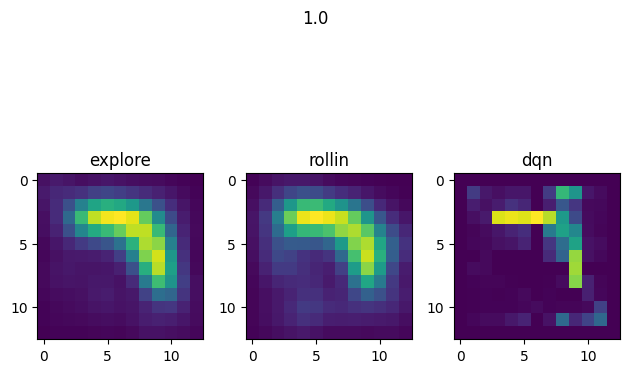

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.ndimage import gaussian_filter as blur

lams = [10000.0, 1000.0, 100.0, 10.0, 1.0]
end_point = 7

for lam in lams:
    explore_rollout_list = np.load(f"./visualization/explore_dqn_{lam}_2_rollout.npy")
    explore_rollout = explore_rollout_list[-1] - explore_rollout_list[end_point]
    explore_rollout = explore_rollout.reshape(13, 13)
    rollin_rollout_list = np.load(f"./visualization/rollin_dqn_{lam}_3_rollout.npy")
    rollin_rollout = rollin_rollout_list[-1] - rollin_rollout_list[end_point]
    rollin_rollout = rollin_rollout.reshape(13, 13)
    dqn_rollout_list = np.load(f"./visualization/pure_dqn_4_rollout.npy")[-1].reshape(13, 13)

    explore_rollout = blur(explore_rollout, 1)
    rollin_rollout = blur(rollin_rollout, 1)
    
    fig, axes = plt.subplots(1, 3)
    fig.suptitle(lam)
    axes[0].imshow(explore_rollout, label='explore')
    axes[1].imshow(rollin_rollout, label='rollin')
    axes[2].imshow(dqn_rollout_list, label='dqn')
    axes[0].title.set_text("explore")
    axes[1].title.set_text("rollin")
    axes[2].title.set_text("dqn")
    fig.tight_layout()

In [19]:
explore_return = np.load(f"./visualization/explore_dqn_{1000.0}_viz.npy")[-1]

In [32]:
explore_rollout[2] - explore_rollout[1]

array([-6.410e-02, -6.410e-02, -6.410e-02, -6.410e-02, -6.410e-02,
       -6.410e-02, -6.410e-02, -6.410e-02, -6.410e-02, -6.410e-02,
       -6.410e-02, -6.410e-02, -6.410e-02, -6.410e-02,  1.346e+01,
        3.339e+01,  9.191e+01, -1.525e+01, -1.692e+01, -6.410e-02,
       -8.000e-02, -1.000e-02, -1.860e+00, -1.860e+00, -1.360e+00,
       -6.410e-02, -6.410e-02,  5.100e-01,  1.340e+01, -1.610e+01,
       -9.800e-01, -6.010e+00, -6.410e-02, -1.000e-02, -6.000e-02,
       -2.610e+00, -2.740e+00, -1.960e+00, -6.410e-02, -6.410e-02,
       -7.000e-02,  2.700e-01, -2.800e-01, -7.000e-02, -1.100e-01,
       -9.000e-02, -6.000e-02,  6.300e-01,  5.300e-01, -2.800e-01,
       -3.000e-02, -6.410e-02, -6.410e-02, -1.850e+00, -7.000e-01,
       -1.600e-01, -1.100e-01, -1.000e-02, -6.410e-02,  0.000e+00,
        5.000e-02,  5.100e-01,  4.700e-01, -8.300e-01, -6.410e-02,
       -6.410e-02, -1.770e+00, -7.200e-01,  1.000e-02, -5.000e-02,
       -5.600e-01, -6.410e-02,  0.000e+00,  6.000e-02,  3.000e

50000
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False  True False False False False
 False  True  True False False False False False  True False False False
 False False  True  True False False False False False False False False
 False False False  True  True False False False False False  True False
 False False False False  True  True False False False False False  True
 False False False False False  True  True  True False  True  True  True
  True False False False False False  True  True False False False False
 False  True  True  True False  True  True  True  True False False False
 False False  True False False False False False  True  True False False
 False False False  True False False  True False False  True  True False
 False False False False False False False False False False  True  True
 False False False False False  True False False False False False  True
  True  True  True  True  True  True  True  T

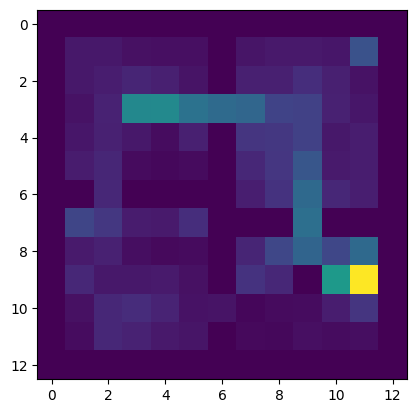

In [72]:
explore_rollout = np.load(f"./visualization/rollin_dqn_10000.0_rollout.npy")
print(len(explore_rollout))
print(explore_rollout[0] == explore_rollout[-1])
square = explore_rollout[-1]

for i in range(len(square)):
    if abs(square[i] - 500) < 1e-3:
        # print("find")
        # square[i] = 0
        pass

plt.imshow(square.reshape(13, 13))
print(square)
# for i in range(len(explore_rollout)):
#     plt.figure()
#     plt.title(f"step={i}")
#     plt.imshow(explore_rollout[i].reshape(13, 13))